<h1><b style="color:rgb(10,151,23);"> Beginner Project: 1 

<h2><b> Sales Prediciton from Existing Customer-Logistic Regression

<h3 style="color:maroon;"><li><i><u> Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h3 style="color:maroon;"><li><u> Import Dataset

In [6]:
sales_df = pd.read_csv("DigitalAd_dataset.csv")
sales_df.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


<h3 style="color:maroon;"><li><u> Summarise Dataset

In [8]:
#check no. of rows and columns
sales_df.shape

(400, 3)

In [9]:
#statistical summary
sales_df.describe()

,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     400 non-null    int64
 1   Salary  400 non-null    int64
 2   Status  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


<h3 style="color:maroon;"><li><u> Check Outliers 

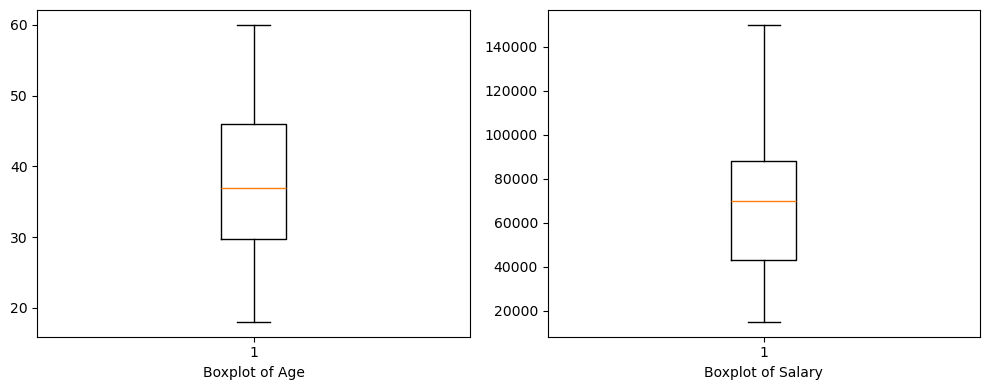

In [12]:
#check outliers, if any remove it
plt.figure(figsize=(10,4))
for i,column in enumerate(sales_df.columns[:2]):
    plt.subplot(1,2,i+1)
    plt.boxplot(x=sales_df[f"{column}"])
    plt.xlabel(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

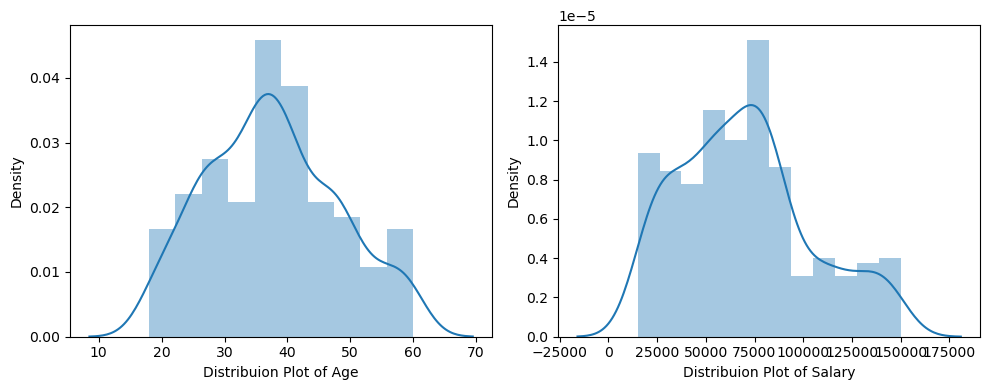

In [13]:
#check distribution of data
plt.figure(figsize=(10,4))
for i,column in enumerate(sales_df.columns[:2]):
    plt.subplot(1,2,i+1)
    sb.distplot(x=sales_df[f"{column}"])
    plt.xlabel(f"Distribuion Plot of {column}")
plt.tight_layout()
plt.show()

<h3 style="color:maroon;"><li><u> Segerate Data into X(Input/Independent Variable) & Y(output/dependent variable)

In [15]:
X = sales_df.iloc[:,:2].values
X
Y = sales_df.iloc[:,2:].values

<h3 style="color:maroon;"><li><u> Splitting Dataset into Train and Test

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state=0)

<h3 style="color:maroon;"><li><u> Feature Scaling</u></h3></u>
<li>We scale our data to make all the feature contribute equally to the result

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h3 style="color:maroon;"><li><u> Training

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state= 0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

<h3 style="color:maroon;"><li><u> Predicting whether new customer with Age and Salary will Buy or not

In [28]:
age = int(input("Enter New Customer Age: "))
sal = int(input("Enter New Customer Salary: "))
newcust = [[age,sal]]
result =model.predict(sc.transform(newcust))
print(result)
if result ==1:
    print("Customer will Buy")
else:
    print("Customer won't Buy")

Enter New Customer Age:  34
Enter New Customer Salary:  23000


[0]
Customer won't Buy


<h3 style="color:maroon;"><li><u> Prediction for all test data

In [30]:
y_pred = model.predict(X_test)

<h3 style="color:maroon;"><li><u> Evaluation Model - Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)

print(f"Confusion Metrics:\n{cm}")

print(f"Accuracy Score:\n{accuracy_score(y_test,y_pred)*100} %")

Confusion Metrics:
[[61  0]
 [20 19]]
Accuracy Score:
80.0 %
